In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

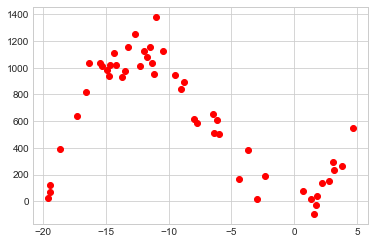

In [2]:
noise_scale = 100
number_of_samples = 50

x = 25*(np.random.rand(number_of_samples, 1) - 0.8)

y = 1 * x**3 + 20 * x**2 + 5 * x + noise_scale*np.random.randn(number_of_samples, 1)

plt.style.use('seaborn-whitegrid')
plt.plot(x,y,'ro')

In [3]:
num_of_genes = 4

sol_per_pop = 100

In [4]:
def calculate_badness_scores(population):
    badness_scores = []

    for i in range(len(population)):
        genes = population[i]
    
        badness = 0
    
        for j in range(len(x)):
        
            y_value = genes[0] * x[j]**3 + genes[1] * x[j]**2 + genes[2] * x[j] + genes[3]
        
            badness += (y_value - y[j])**2
        
        badness_scores = badness_scores + [badness]
        
    return badness_scores

In [5]:
def find_best_position(x, badness_scores):
    best_chromosomes_position = []

    for i in range(x):
        minpos = badness_scores.index(min(badness_scores))
        best_chromosomes_position += [minpos]
        del badness_scores[minpos]
        
    return best_chromosomes_position

In [6]:
def mutation(best_chromosomes):
    
    chromosomes_after_mutations = []
    
    for i in range(len(best_chromosomes)):
        chromosomes_after_mutations += [best_chromosomes[i]]

        for j in range(len(best_chromosomes)-1):
            best_chromosomes_copied = copy.deepcopy(best_chromosomes)
            
            chromosome_to_mutate = best_chromosomes_copied[i]
            
            gene_to_mutate = np.random.randint(low = 0, high= 4)
                        
            mutated_gene = chromosome_to_mutate[gene_to_mutate] * random.uniform(0.0, 2.0)
                        
            chromosome_to_mutate[gene_to_mutate] = mutated_gene
            chromosomes_after_mutations += [chromosome_to_mutate]
            
    return chromosomes_after_mutations

In [7]:
def generation(num_of_genes, sol_per_pop, population):
        
    #Calculate the badness score of each chromosome in the population

    badness_scores = calculate_badness_scores(population)
        
    #Find the positions of the x=10 best chromosomes in the population
    
    best_chromosomes_position = find_best_position(10, badness_scores)
        
    #Add the best chromosomes to separate array
    best_chromosomes = []

    for i in range(len(best_chromosomes_position)):
        best_chromosomes += [population[best_chromosomes_position[i]]]
        
    #Mutate a random gene in each of the 10 best chromosomes of the population
    #Do this nine times for each chromosome and keep the original chromosome 
    chromosomes_after_mutations = mutation(best_chromosomes)
        
    return chromosomes_after_mutations

In [8]:
# Calculate an initial population
initial_population = np.random.uniform(low = -5.0, high = 30.0, size=(sol_per_pop, num_of_genes))

In [9]:
# Find the first generation

first_generation = generation(num_of_genes, sol_per_pop, initial_population)

print(first_generation)

[array([ 1.26719269, 20.95387852, 25.2957916 , 27.95685843]), array([ 1.26719269, 20.95387852, 25.2957916 , 34.20281542]), array([ 1.26719269, 20.95387852, 25.2957916 , 30.83157413]), array([ 1.26719269, 20.95387852, 34.2609031 , 27.95685843]), array([ 0.15746529, 20.95387852, 25.2957916 , 27.95685843]), array([ 0.60388735, 20.95387852, 25.2957916 , 27.95685843]), array([ 1.26719269,  7.71996517, 25.2957916 , 27.95685843]), array([ 1.26719269, 20.95387852, 25.2957916 , 14.90908905]), array([ 1.26719269, 20.95387852, 25.2957916 , 34.37242909]), array([ 1.26719269, 20.95387852, 14.40406282, 27.95685843]), array([23.63464495, -3.04404292, 27.79626269, -4.12433229]), array([12.02692846, -3.04404292, 27.79626269, -4.12433229]), array([36.66303478, -3.04404292, 27.79626269, -4.12433229]), array([23.63464495, -3.04404292, 27.79626269, -5.41812457]), array([23.63464495, -3.04404292, 27.79626269, -2.12393887]), array([23.63464495, -4.52878426, 27.79626269, -4.12433229]), array([ 0.984382  , -3.

In [10]:
# Repeat 499 more times to find the final generation to have 500 trials

final_generation = first_generation

for i in range(500):
    final_generation = generation(num_of_genes, sol_per_pop, final_generation)

In [11]:
#Find the best array after the 500 trials

badness_scores = calculate_badness_scores(final_generation)
best_position = find_best_position(1, badness_scores)

best_chromosome = final_generation[best_position[0]]

In [12]:
pred_poly = np.poly1d(np.array(best_chromosome))
print(pred_poly)

        3         2
0.9655 x + 18.99 x + 7.922e-16 x + 16.43


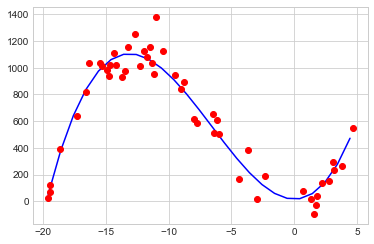

In [13]:
x_pred = np.arange(min(x), max(x))
y_pred = pred_poly(x_pred)
plt.plot(x_pred, y_pred, 'b')
plt.plot(x,y,'ro')
plt.show()